In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
data = pd.read_csv('/content/df_imputed_final_final.csv')
#data = pd.read_csv('/Users/maggiehuang/Desktop/INSY662_Data_Mining_and_Visualization_for_Analytic/INSY662-Data-Mining-and-Visualization-Project/Fire_Incidents_Data_Imputed.csv')

# 1. Split Data

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Separate target variable and features
X = data.drop(columns=['Estimated_Dollar_Loss'])
y = data['Estimated_Dollar_Loss']

# Encode categorical variables
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))  # Convert to string to handle any non-categorical object types

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Random Forest Regressor for Predicting 'Estimated_Dollar_Loss'

In [ ]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 35, 50],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve best parameters and compute RMSE
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation RMSE:", np.sqrt(-grid_search.best_score_))

# Retrieve feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 300}
Best Cross-Validation RMSE: 121592.97685430734
Feature Importances:
                                              Feature  Importance
8                      Number_of_responding_personnel    0.681435
18                              Response_Time_Seconds    0.056255
2                                      Extent_Of_Fire    0.046239
16                          Status_of_Fire_On_Arrival    0.028805
17                         TFS_Firefighter_Casualties    0.025460
14                         Sprinkler_System_Operation    0.015058
13                                       Smoke_Spread    0.014604
23                            Area_of_Origin_Category    0.014346
9                          Smoke_Alarm_at_Fire_Origin    0.011115
21                    Material_First_Ignited_Category    0.010577
24                            Possible_Cause_Category    0.010310
19                           Level_Of

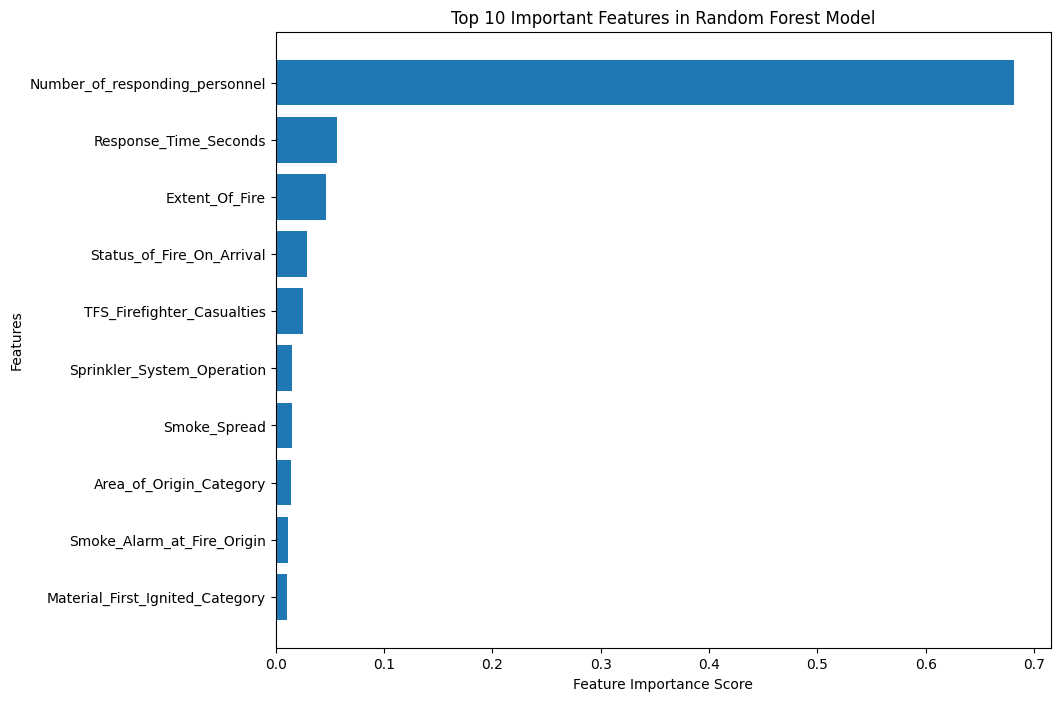

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest Model")
plt.show()

## Running Random Forest using only the top 10 features

In [12]:
top_10_features = [
    'Number_of_responding_personnel', 'Response_Time_Seconds',
    'Extent_Of_Fire', 'Status_of_Fire_On_Arrival',
    'TFS_Firefighter_Casualties', 'Sprinkler_System_Operation',
    'Smoke_Spread', 'Area_of_Origin_Category',
    'Smoke_Alarm_at_Fire_Origin', 'Material_First_Ignited_Category'
]

# Subset the training and testing data to include only the top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define parameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [65, 100, 200],  # Number of trees in the forest
    'max_depth': [7, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum samples required to be at a leaf node
}


# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_root_mean_squared_error')

# Fit grid search to the data
grid_search.fit(X_train_top10, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best model from the grid search
best_rf_regressor = grid_search.best_estimator_

# Retrieve and display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Compute and display the best cross-validation RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best Cross-Validation RMSE (GridSearchCV):", best_rmse)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation RMSE (GridSearchCV): 347.9104308939649


# 3. Gradient Boosting Regressor for Predicting 'Estimated_Dollar_Loss'


In [ ]:
# Define the top ten features
top_10_features = [
    'Number_of_responding_personnel',
    'Response_Time_Seconds',
    'Sprinkler_System_Operation',
    'Extent_Of_Fire',
    'Status_of_Fire_On_Arrival',
    'Smoke_Spread',
    'TFS_Firefighter_Casualties',
    'Area_of_Origin_Category',
    'Possible_Cause_Category',
    'Smoke_Alarm_at_Fire_Origin'
]

# Subset the training and testing data to include only the top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [75, 100, 200],
    'max_depth': [20, 35, 55],
    # 'learning_rate': [0.01, 0.1, 0.2],  # Uncomment if you decide to tune this parameter
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Utilize all available cores for faster computation
    verbose=2    # Optional: Set to 1 or 2 to get progress messages
)

# Fit the model
grid_search.fit(X_train_top10, y_train)

# Retrieve and display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Compute and display the best cross-validation RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best Cross-Validation RMSE (GridSearchCV):", best_rmse)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 75}
Best Cross-Validation RMSE (GridSearchCV): 129071.9669268928
Feature Importances:
                                              Feature  Importance
0                      Number_of_responding_personnel    0.473170
1                               Response_Time_Seconds    0.107607
5                          Sprinkler_System_Operation    0.065106
2                                      Extent_Of_Fire    0.053181
3                           Status_of_Fire_On_Arrival    0.032194
6                                        Smoke_Spread    0.027861
4                          TFS_Firefighter_Casualties    0.023460
7                             Area_of_Origin_Category    0.019778
10                            Possible_Cause_Category    0.019174
8                          Smoke_Alarm_at_Fire_Origin    0.017202
9                     Material_First_Ignited_Category    0.016798
21                      

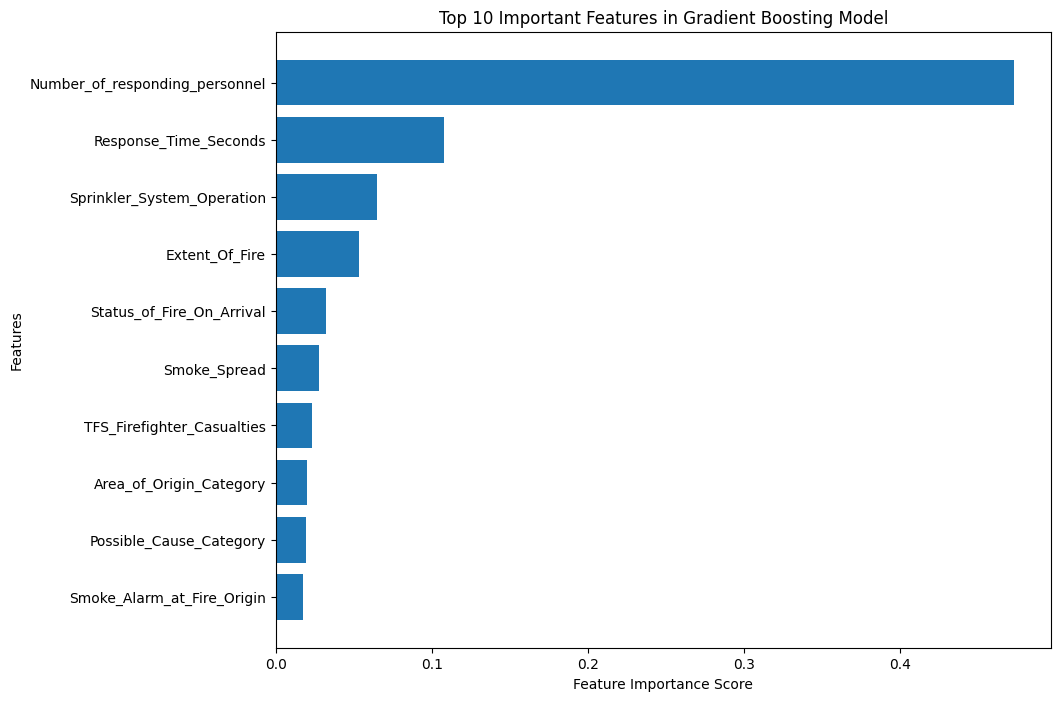

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Gradient Boosting Model")
plt.show()

## Running Grandient Boosting using only the top 10 features

In [15]:
top_10_features = [
    'Number_of_responding_personnel',
    'Response_Time_Seconds',
    'Sprinkler_System_Operation',
    'Extent_Of_Fire',
    'Status_of_Fire_On_Arrival',
    'Smoke_Spread',
    'TFS_Firefighter_Casualties',
    'Area_of_Origin_Category',
    'Possible_Cause_Category',
    'Smoke_Alarm_at_Fire_Origin'
]

# Subset the training and testing data to include only the top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40],
    'max_depth': [3, 7, 10, 15],
    # 'learning_rate': [0.01, 0.1, 0.2],  # Uncomment if you decide to tune this parameter
    'min_samples_split': [1, 3, 5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Utilize all available cores for faster computation
    verbose=2    # Optional: Set to 1 or 2 to get progress messages
)

# Fit the model
grid_search.fit(X_train_top10, y_train)

# Retrieve and display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Compute and display the best cross-validation RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best Cross-Validation RMSE (GridSearchCV):", best_rmse)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 20}
Best Cross-Validation RMSE (GridSearchCV): 124119.56456975787
